# **IMPORTING REQUIRED LIBRARIES**

In [170]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# **READING DATAFRAME BY PANDAS**

In [171]:
data = pd.read_csv('cars_price.csv')

In [172]:
data.shape

(205, 26)

In [173]:
data.head(5).style.background_gradient(cmap='OrRd')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.600000,168.800000,64.100000,48.800000,2548,dohc,four,130,mpfi,3.47,2.68,9.000000,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.600000,168.800000,64.100000,48.800000,2548,dohc,four,130,mpfi,3.47,2.68,9.000000,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.500000,171.200000,65.500000,52.400000,2823,ohcv,six,152,mpfi,2.68,3.47,9.000000,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.800000,176.600000,66.200000,54.300000,2337,ohc,four,109,mpfi,3.19,3.4,10.000000,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.400000,176.600000,66.400000,54.300000,2824,ohc,five,136,mpfi,3.19,3.4,8.000000,115,5500,18,22,17450


In [174]:
data.describe().round(3).style.background_gradient(cmap='afmhot')

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834000,98.757000,174.049000,65.908000,53.725000,2555.566000,126.907000,10.143000,25.220000,30.751000
std,1.245000,6.022000,12.337000,2.145000,2.444000,520.680000,41.643000,3.972000,6.542000,6.886000
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [175]:
data.info() # LET WE KNOW INFORMATION ABOUT THE DATAFRAME

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

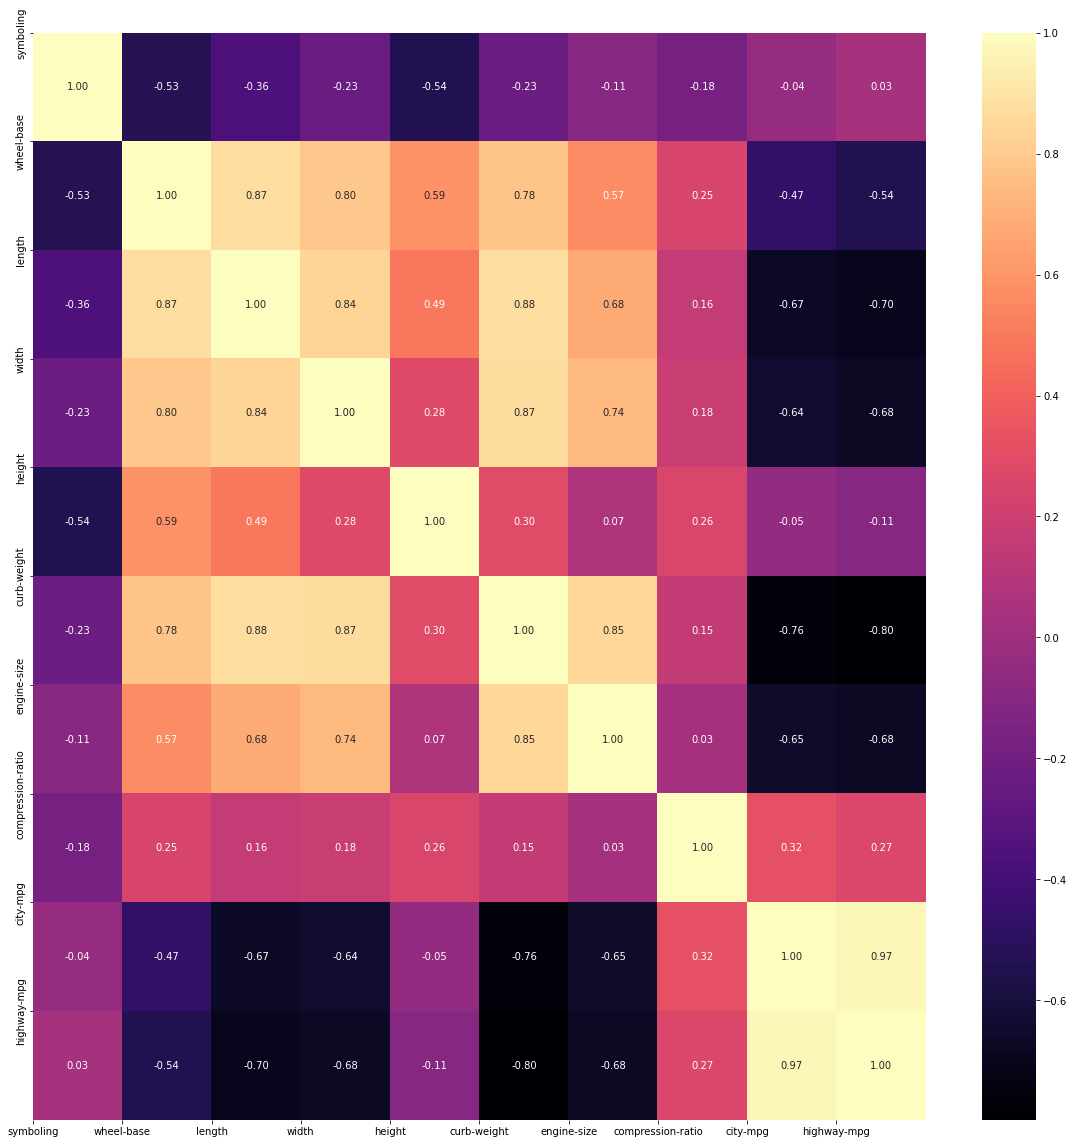

In [176]:
corr = data.corr() # HEATMAP SHOWS CORRELATIO BETWEEN THE NUMERICAL FEATURES
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [177]:
cols = data.columns
cols

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [178]:
data.nunique() # NUMBER OF UNIQUE VALUES ARE HAVING ALL FEATURES

symboling              6
normalized-losses     52
make                  22
fuel-type              2
aspiration             2
num-of-doors           3
body-style             5
drive-wheels           3
engine-location        2
wheel-base            53
length                75
width                 44
height                49
curb-weight          171
engine-type            7
num-of-cylinders       7
engine-size           44
fuel-system            8
bore                  39
stroke                37
compression-ratio     32
horsepower            60
peak-rpm              24
city-mpg              29
highway-mpg           30
price                187
dtype: int64

In [179]:
data.isnull().sum() # HERE IT SHOWS THERE IS NO NULL VALUES OCCURED BUT IT'S HAD LIKE ?, -1, -2. SO I PERFORMS THE FOLLOWING STEPS 

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [180]:
data['normalized-losses'].value_counts() # normalize losses having null 41 values 

?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: normalized-losses, dtype: int64

In [181]:
data['symboling'].value_counts() # symboling having 25 null values 

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [182]:
data['num-of-doors'].value_counts() # Number of doors having 2 null values 

four    114
two      89
?         2
Name: num-of-doors, dtype: int64

In [183]:
data['num-of-doors'].unique()

array(['two', 'four', '?'], dtype=object)

In [184]:
data['price'].value_counts() # price having 4 null values 

?        4
8921     2
18150    2
8845     2
8495     2
        ..
45400    1
16503    1
5389     1
6189     1
22625    1
Name: price, Length: 187, dtype: int64

In [185]:
data['price'].unique()

array(['13495', '16500', '13950', '17450', '15250', '17710', '18920',
       '23875', '?', '16430', '16925', '20970', '21105', '24565', '30760',
       '41315', '36880', '5151', '6295', '6575', '5572', '6377', '7957',
       '6229', '6692', '7609', '8558', '8921', '12964', '6479', '6855',
       '5399', '6529', '7129', '7295', '7895', '9095', '8845', '10295',
       '12945', '10345', '6785', '11048', '32250', '35550', '36000',
       '5195', '6095', '6795', '6695', '7395', '10945', '11845', '13645',
       '15645', '8495', '10595', '10245', '10795', '11245', '18280',
       '18344', '25552', '28248', '28176', '31600', '34184', '35056',
       '40960', '45400', '16503', '5389', '6189', '6669', '7689', '9959',
       '8499', '12629', '14869', '14489', '6989', '8189', '9279', '5499',
       '7099', '6649', '6849', '7349', '7299', '7799', '7499', '7999',
       '8249', '8949', '9549', '13499', '14399', '17199', '19699',
       '18399', '11900', '13200', '12440', '13860', '15580', '16900',


In [186]:
data.loc[data.price == '?', 'price']

9      ?
44     ?
45     ?
129    ?
Name: price, dtype: object

In [187]:
data.replace('?',np.nan, inplace = True) # if we want to handle missing values this and following step will be performed 

In [188]:
data['price'].unique()

array(['13495', '16500', '13950', '17450', '15250', '17710', '18920',
       '23875', nan, '16430', '16925', '20970', '21105', '24565', '30760',
       '41315', '36880', '5151', '6295', '6575', '5572', '6377', '7957',
       '6229', '6692', '7609', '8558', '8921', '12964', '6479', '6855',
       '5399', '6529', '7129', '7295', '7895', '9095', '8845', '10295',
       '12945', '10345', '6785', '11048', '32250', '35550', '36000',
       '5195', '6095', '6795', '6695', '7395', '10945', '11845', '13645',
       '15645', '8495', '10595', '10245', '10795', '11245', '18280',
       '18344', '25552', '28248', '28176', '31600', '34184', '35056',
       '40960', '45400', '16503', '5389', '6189', '6669', '7689', '9959',
       '8499', '12629', '14869', '14489', '6989', '8189', '9279', '5499',
       '7099', '6649', '6849', '7349', '7299', '7799', '7499', '7999',
       '8249', '8949', '9549', '13499', '14399', '17199', '19699',
       '18399', '11900', '13200', '12440', '13860', '15580', '16900',


In [189]:
imputer = SimpleImputer(strategy = 'mean')
imputer = imputer.fit(data[['price']])
data[['price']] = imputer.transform(data[['price']])
data[['price']]

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


In [190]:
data['price'].unique() # now missing values are handled by the mean of the feature

array([13495.        , 16500.        , 13950.        , 17450.        ,
       15250.        , 17710.        , 18920.        , 23875.        ,
       13207.12935323, 16430.        , 16925.        , 20970.        ,
       21105.        , 24565.        , 30760.        , 41315.        ,
       36880.        ,  5151.        ,  6295.        ,  6575.        ,
        5572.        ,  6377.        ,  7957.        ,  6229.        ,
        6692.        ,  7609.        ,  8558.        ,  8921.        ,
       12964.        ,  6479.        ,  6855.        ,  5399.        ,
        6529.        ,  7129.        ,  7295.        ,  7895.        ,
        9095.        ,  8845.        , 10295.        , 12945.        ,
       10345.        ,  6785.        , 11048.        , 32250.        ,
       35550.        , 36000.        ,  5195.        ,  6095.        ,
        6795.        ,  6695.        ,  7395.        , 10945.        ,
       11845.        , 13645.        , 15645.        ,  8495.        ,
      

In [191]:
data['num-of-doors'].unique()

array(['two', 'four', nan], dtype=object)

In [192]:
y = data['price']
X = data.drop('price', axis = 1)

In [193]:
X.head(20)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,five,131,mpfi,3.13,3.4,8.3,140,5500,17,20
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,five,131,mpfi,3.13,3.4,7.0,160,5500,16,22


In [194]:
from sklearn.model_selection import train_test_split

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [196]:
X_train.isnull().sum()

symboling             0
normalized-losses    27
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  3
stroke                3
compression-ratio     0
horsepower            0
peak-rpm              0
city-mpg              0
highway-mpg           0
dtype: int64

In [197]:
X_test.isnull().sum()

symboling             0
normalized-losses    14
make                  0
fuel-type             0
aspiration            0
num-of-doors          0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  1
stroke                1
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
dtype: int64

In [198]:
drop_cols = ['symboling', 'normalized-losses', 'make', 'num-of-doors', 'body-style', 'engine-type',
              'num-of-cylinders', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
              'peak-rpm', 'city-mpg', 'highway-mpg']

In [199]:
X_train = X_train.drop(drop_cols, axis = 1)

In [200]:
X_train.shape

(164, 10)

In [201]:
X_train.isnull().sum()

fuel-type          0
aspiration         0
drive-wheels       0
engine-location    0
wheel-base         0
length             0
width              0
height             0
curb-weight        0
engine-size        0
dtype: int64

In [202]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 4 to 172
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fuel-type        164 non-null    object 
 1   aspiration       164 non-null    object 
 2   drive-wheels     164 non-null    object 
 3   engine-location  164 non-null    object 
 4   wheel-base       164 non-null    float64
 5   length           164 non-null    float64
 6   width            164 non-null    float64
 7   height           164 non-null    float64
 8   curb-weight      164 non-null    int64  
 9   engine-size      164 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 14.1+ KB


In [203]:
X_test = X_test.drop(drop_cols, axis = 1)

In [204]:
X_test.shape

(41, 10)

In [205]:
X_test.isnull().sum()

fuel-type          0
aspiration         0
drive-wheels       0
engine-location    0
wheel-base         0
length             0
width              0
height             0
curb-weight        0
engine-size        0
dtype: int64

In [206]:
OHE = OneHotEncoder()

In [207]:
OHE_columns = OHE.fit_transform(X_train[['fuel-type', 'aspiration', 'drive-wheels', 'engine-location']])

In [208]:
OHE_columns.toarray()

array([[0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 1., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 1., 1., 0.],
       [0., 1., 1., ..., 1., 1., 0.],
       [0., 1., 1., ..., 1., 1., 0.]])

In [209]:
OHE_columns.toarray().shape

(164, 9)

In [210]:
OHE_columns = pd.DataFrame(OHE_columns.toarray(), columns = ['FT1', 'FT2', 'ASP1', 'ASP2', 'DW1', 'DW2', 'DW3', 'EL1', 'EL2'])

In [211]:
OHE_columns

,FT1,FT2,ASP1,ASP2,DW1,DW2,DW3,EL1,EL2
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
159,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
160,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
161,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
162,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [212]:
X_train.columns

Index(['fuel-type', 'aspiration', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight',
       'engine-size'],
      dtype='object')

In [213]:
X_train[['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size']]

,wheel-base,length,width,height,curb-weight,engine-size
4,99.4,176.6,66.4,54.3,2824,136
71,115.6,202.6,71.7,56.5,3740,234
134,99.1,186.6,66.5,56.1,2707,121
145,97.0,172.0,65.4,54.3,2510,108
122,93.7,167.3,63.8,50.8,2191,98
...,...,...,...,...,...,...
67,110.0,190.9,70.3,56.5,3515,183
192,100.4,180.2,66.9,55.1,2579,97
117,108.0,186.7,68.3,56.0,3130,134
47,113.0,199.6,69.6,52.8,4066,258


In [214]:
X_train.reset_index(drop = True, inplace = True)
OHE_columns.reset_index(drop = True, inplace = True)

In [215]:
X_train = pd.concat([X_train[['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size']], OHE_columns], axis = 1)

In [216]:
X_train

,wheel-base,length,width,height,curb-weight,engine-size,FT1,FT2,ASP1,ASP2,DW1,DW2,DW3,EL1,EL2
0,99.4,176.6,66.4,54.3,2824,136,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,115.6,202.6,71.7,56.5,3740,234,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,99.1,186.6,66.5,56.1,2707,121,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,97.0,172.0,65.4,54.3,2510,108,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,93.7,167.3,63.8,50.8,2191,98,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,110.0,190.9,70.3,56.5,3515,183,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
160,100.4,180.2,66.9,55.1,2579,97,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
161,108.0,186.7,68.3,56.0,3130,134,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
162,113.0,199.6,69.6,52.8,4066,258,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [217]:
OHE_columns_test = OHE.transform(X_test[['fuel-type', 'aspiration', 'drive-wheels', 'engine-location']])

In [218]:
OHE_columns_test = pd.DataFrame(OHE_columns_test.toarray(), columns = ['FT1', 'FT2', 'ASP1', 'ASP2', 'DW1', 'DW2', 'DW3', 'EL1', 'EL2'])
OHE_columns_test

,FT1,FT2,ASP1,ASP2,DW1,DW2,DW3,EL1,EL2
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
5,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
6,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
7,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
8,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
9,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [219]:
X_test.reset_index(drop = True, inplace = True)
OHE_columns_test.reset_index(drop = True, inplace = True)

In [220]:
X_test = pd.concat([X_test[['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size']], OHE_columns_test], axis = 1)

In [221]:
X_test.shape

(41, 15)

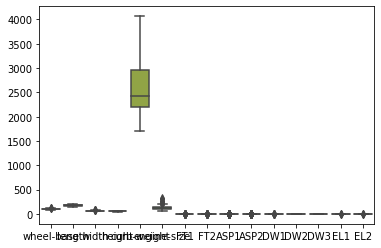

In [222]:
sns.boxplot(data = X_train)

In [223]:
ss = StandardScaler()

In [224]:
X_train = ss.fit_transform(X_train)

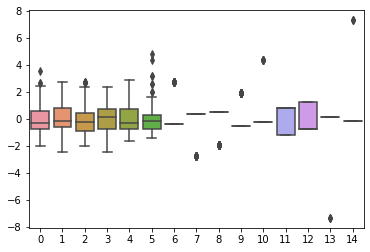

In [225]:
sns.boxplot(data = X_train)

In [226]:
X_test = ss.transform(X_test)

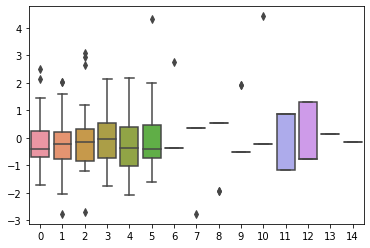

In [227]:
sns.boxplot(data = X_test)

## **BUILDING MODELS FOR REGRESSION**

In [228]:
lr = LinearRegression()
rdg = Ridge()
las = Lasso()
svr = SVR()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
knn = KNeighborsRegressor()


In [229]:
lr.fit(X_train, y_train)
rdg.fit(X_train, y_train)
las.fit(X_train, y_train)
svr.fit(X_train, y_train)
dtr.fit(X_train, y_train)
rfr.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [230]:
s1t = lr.score(X_train, y_train)
s2t = rdg.score(X_train, y_train)
s3t = las.score(X_train, y_train)
s4t = svr.score(X_train, y_train)
s5t = dtr.score(X_train, y_train)
s6t = rfr.score(X_train, y_train)
s7t = knn.score(X_train, y_train)

In [231]:
train_score = [s1t, s2t, s3t, s4t, s5t, s6t, s7t]
train_score

[0.8801436901253067,
 0.8801070190974007,
 0.8801426618243768,
 -0.12642200471800535,
 0.9984485311120054,
 0.9884316914666289,
 0.8811014516812941]

In [232]:
s1 = lr.score(X_test, y_test)
s2 = rdg.score(X_test, y_test)
s3 = las.score(X_test, y_test)
s4 = svr.score(X_test, y_test)
s5 = dtr.score(X_test, y_test)
s6 = rfr.score(X_test, y_test)
s7 = knn.score(X_test, y_test)

In [233]:
test_scores = [s1, s2, s3, s4, s5, s6, s7]
test_scores

[0.6207084856088805,
 0.6229276082603429,
 0.621215395834259,
 -0.08438649080425242,
 0.636800835362628,
 0.681783358090361,
 0.616951913076113]

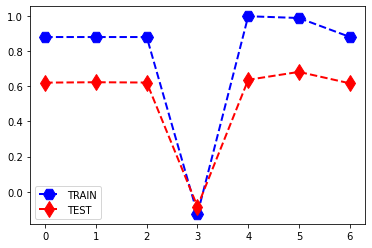

In [234]:
plt.plot(train_score, color='b', marker='H', linestyle='dashed', linewidth=2, markersize=12, label = 'TRAIN')
plt.plot(test_scores, color='r', marker='d', linestyle='dashed', linewidth=2, markersize=12, label = 'TEST')
plt.legend()

## **FINAL MODEL IS DECISION TREE REGRESSOR**

FINDING MEAN SQUARED ERROR FOR DECISION TREE REGRESOR ON TEST DATA

In [235]:
y_pred = dtr.predict(X_test)
print(mean_squared_error(y_test, y_pred, multioutput='uniform_average', squared= True))  # if squared is false then the error will be 5043.354929188061  

24831998.45396063


FINDING MEAN ABSOLUTE ERROR

In [236]:
y_pred = dtr.predict(X_test)
print(mean_absolute_error(y_test, y_pred, multioutput = 'uniform_average')) #raw_values : [2758.36900862]

2707.783642761801


FINDING R2 SCORE

In [237]:
y_pred = dtr.predict(X_test)
print(r2_score(y_test, y_pred, multioutput = 'variance_weighted')) 

0.636800835362628


In [238]:
param_grid = {'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'], 
              'splitter' : ['best', 'random'], 'max_depth':[40, 99, 202], 'max_features' : ['auto', 'sqrt', 'log2'], 
              'min_weight_fraction_leaf': [0, 0.6], 'min_impurity_decrease' : [0.1, 0.6, 0.9]}

In [239]:
GSCV = GridSearchCV(DecisionTreeRegressor(), param_grid = param_grid, cv=7)

In [240]:
GSCV.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1512 fits failed out of a total of 3024.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1512 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 1320, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 304, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_

GridSearchCV(cv=7, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [40, 99, 202],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_impurity_decrease': [0.1, 0.6, 0.9],
                         'min_weight_fraction_leaf': [0, 0.6],
                         'splitter': ['best', 'random']})

In [241]:
GSCV.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 40,
 'max_features': 'auto',
 'min_impurity_decrease': 0.9,
 'min_weight_fraction_leaf': 0,
 'splitter': 'best'}

In [242]:
GSCV.best_score_

0.8822269607172162

In [243]:
param_grid = {'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'], 
              'splitter' : ['best', 'random'], 'max_depth':[40, 99, 202], 'max_features' : ['auto', 'sqrt', 'log2'], 
              'min_weight_fraction_leaf': [0, 0.6], 'min_impurity_decrease' : [0.1, 0.6, 0.9]}

In [244]:
rscv = RandomizedSearchCV(DecisionTreeRegressor(), param_grid, n_iter = 7, cv = 3, return_train_score=True) 

In [245]:
rscv.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
9 fits failed out of a total of 21.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 1320, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 304, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf mus

RandomizedSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_iter=7,
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [40, 99, 202],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_impurity_decrease': [0.1, 0.6,
                                                                  0.9],
                                        'min_weight_fraction_leaf': [0, 0.6],
                                        'splitter': ['best', 'random']},
                   return_train_score=True)

In [246]:
rscv.best_params_

{'splitter': 'best',
 'min_weight_fraction_leaf': 0,
 'min_impurity_decrease': 0.6,
 'max_features': 'log2',
 'max_depth': 202,
 'criterion': 'poisson'}

In [247]:
rscv.best_score_

0.8135693007018405

### **CONCLUSION**

IN THIS PROJECT 7 REGRESSION MODELS USING ON CAR PRICE DATASET. THESE ARE  LinearRegression, Ridge, Lasso, SVR, DecisionTreeRegressor, RandomForestRegressor, KNeighborsRegressor. AMONGST THAT Decision Tree Regressor gives the better score






